In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
weather_data = pd.read_csv('/home/roman/GitHub/MATH-9/data/weatherAUS.csv')
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [262]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [263]:
weather_data.isnull().sum().sum()

343248

Можно отметить, что в данных много пропусков.

В некоторых признаках пропусков более 40 % — удалим такие признаки.

In [264]:
weather_data = weather_data.dropna(thresh=weather_data.shape[0]*0.6, axis=1)

Теперь обработаем признаки *'RainToday'* и *'RainTomorrow'* таким образом, чтобы вместо **yes** было значение **1**, а вместо **no** — значение **0**.

In [265]:
weather_data['RainToday'] = weather_data['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)
weather_data['RainTomorrow'] = weather_data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

In [266]:
round(weather_data['RainToday'].mean(), 2)

0.22

Обработаемпризнак *'Date'* таким образом, чтобы выделить в отдельный признак *'Month'* (номер месяца). Изначальный признак *'Date'* удалим.

In [267]:
weather_data['Month'] = pd.to_datetime(weather_data['Date']).dt.month
weather_data = weather_data.drop('Date', axis=1)

Обработаем оставшиеся категориальные признаки с помощью метода ***get_dummies***.

In [268]:
catigorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Month']
weather_data = pd.get_dummies(weather_data, columns=catigorical_columns)
weather_data.shape[1]

124

Удалим все строки, где есть пропуски. Далее разбьём данные на обучающую и тестовую выборки в соотношении 70/30.

In [269]:
weather_data = weather_data.dropna(how='any', axis=0)

X = weather_data.drop('RainTomorrow', axis=1)
y = weather_data['RainTomorrow']

In [270]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

Теперь можно перейти к обучению прогностических моделей. Начнём с того, что построим простейшую логистическую регрессию (без настройки гиперпараметров). Это будет та модель, с качеством которой мы будем сравнивать результаты, полученные далее, чтобы оценить превосходство случайного леса над простыми методами.

In [271]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [272]:
from sklearn.metrics import roc_auc_score

print("ROC_AUC on test data is {:.2f}".format(roc_auc_score(y_test, lr.predict(X_test))))

ROC_AUC on test data is 0.73


Теперь обучим на наших данных другой алгоритм — дерево решений.

In [273]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth': [5,7,9,11]}

gscv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                    param_grid=params, 
                    cv=3, 
                    scoring="roc_auc",
                    n_jobs=-1
                    )

gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4]},
             scoring='roc_auc')

In [274]:
gscv.best_params_

{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}

Обучим решающее дерево с гиперпараметрами, определёнными выше.

In [282]:
dt = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)

In [286]:
print("ROC_AUC on train data is {:.2f}".format(roc_auc_score(y_train, dt_pred_train)))
print("ROC_AUC on test data is {:.2f}".format(roc_auc_score(y_test, dt_pred_test)))

ROC_AUC on train data is 0.71
ROC_AUC on test data is 0.71


Деревья решений не помогли нам в улучшении качества модели, так что попробуем ещё уменьшить ошибку с помощью ансамблей.

Построим случайный лес, включающий 100 деревьев.

In [287]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=31)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=31)

In [288]:
print("ROC_AUC on test data is {:.2f}".format(roc_auc_score(y_test, rfc.predict(X_test))))

ROC_AUC on test data is 0.74


***RandomForestClassifier*** показал наилучшую метрику.

Благодаря случайному лесу можно узнать, какие признаки оказывают большее влияние на целевую переменную по сравнению с другими.

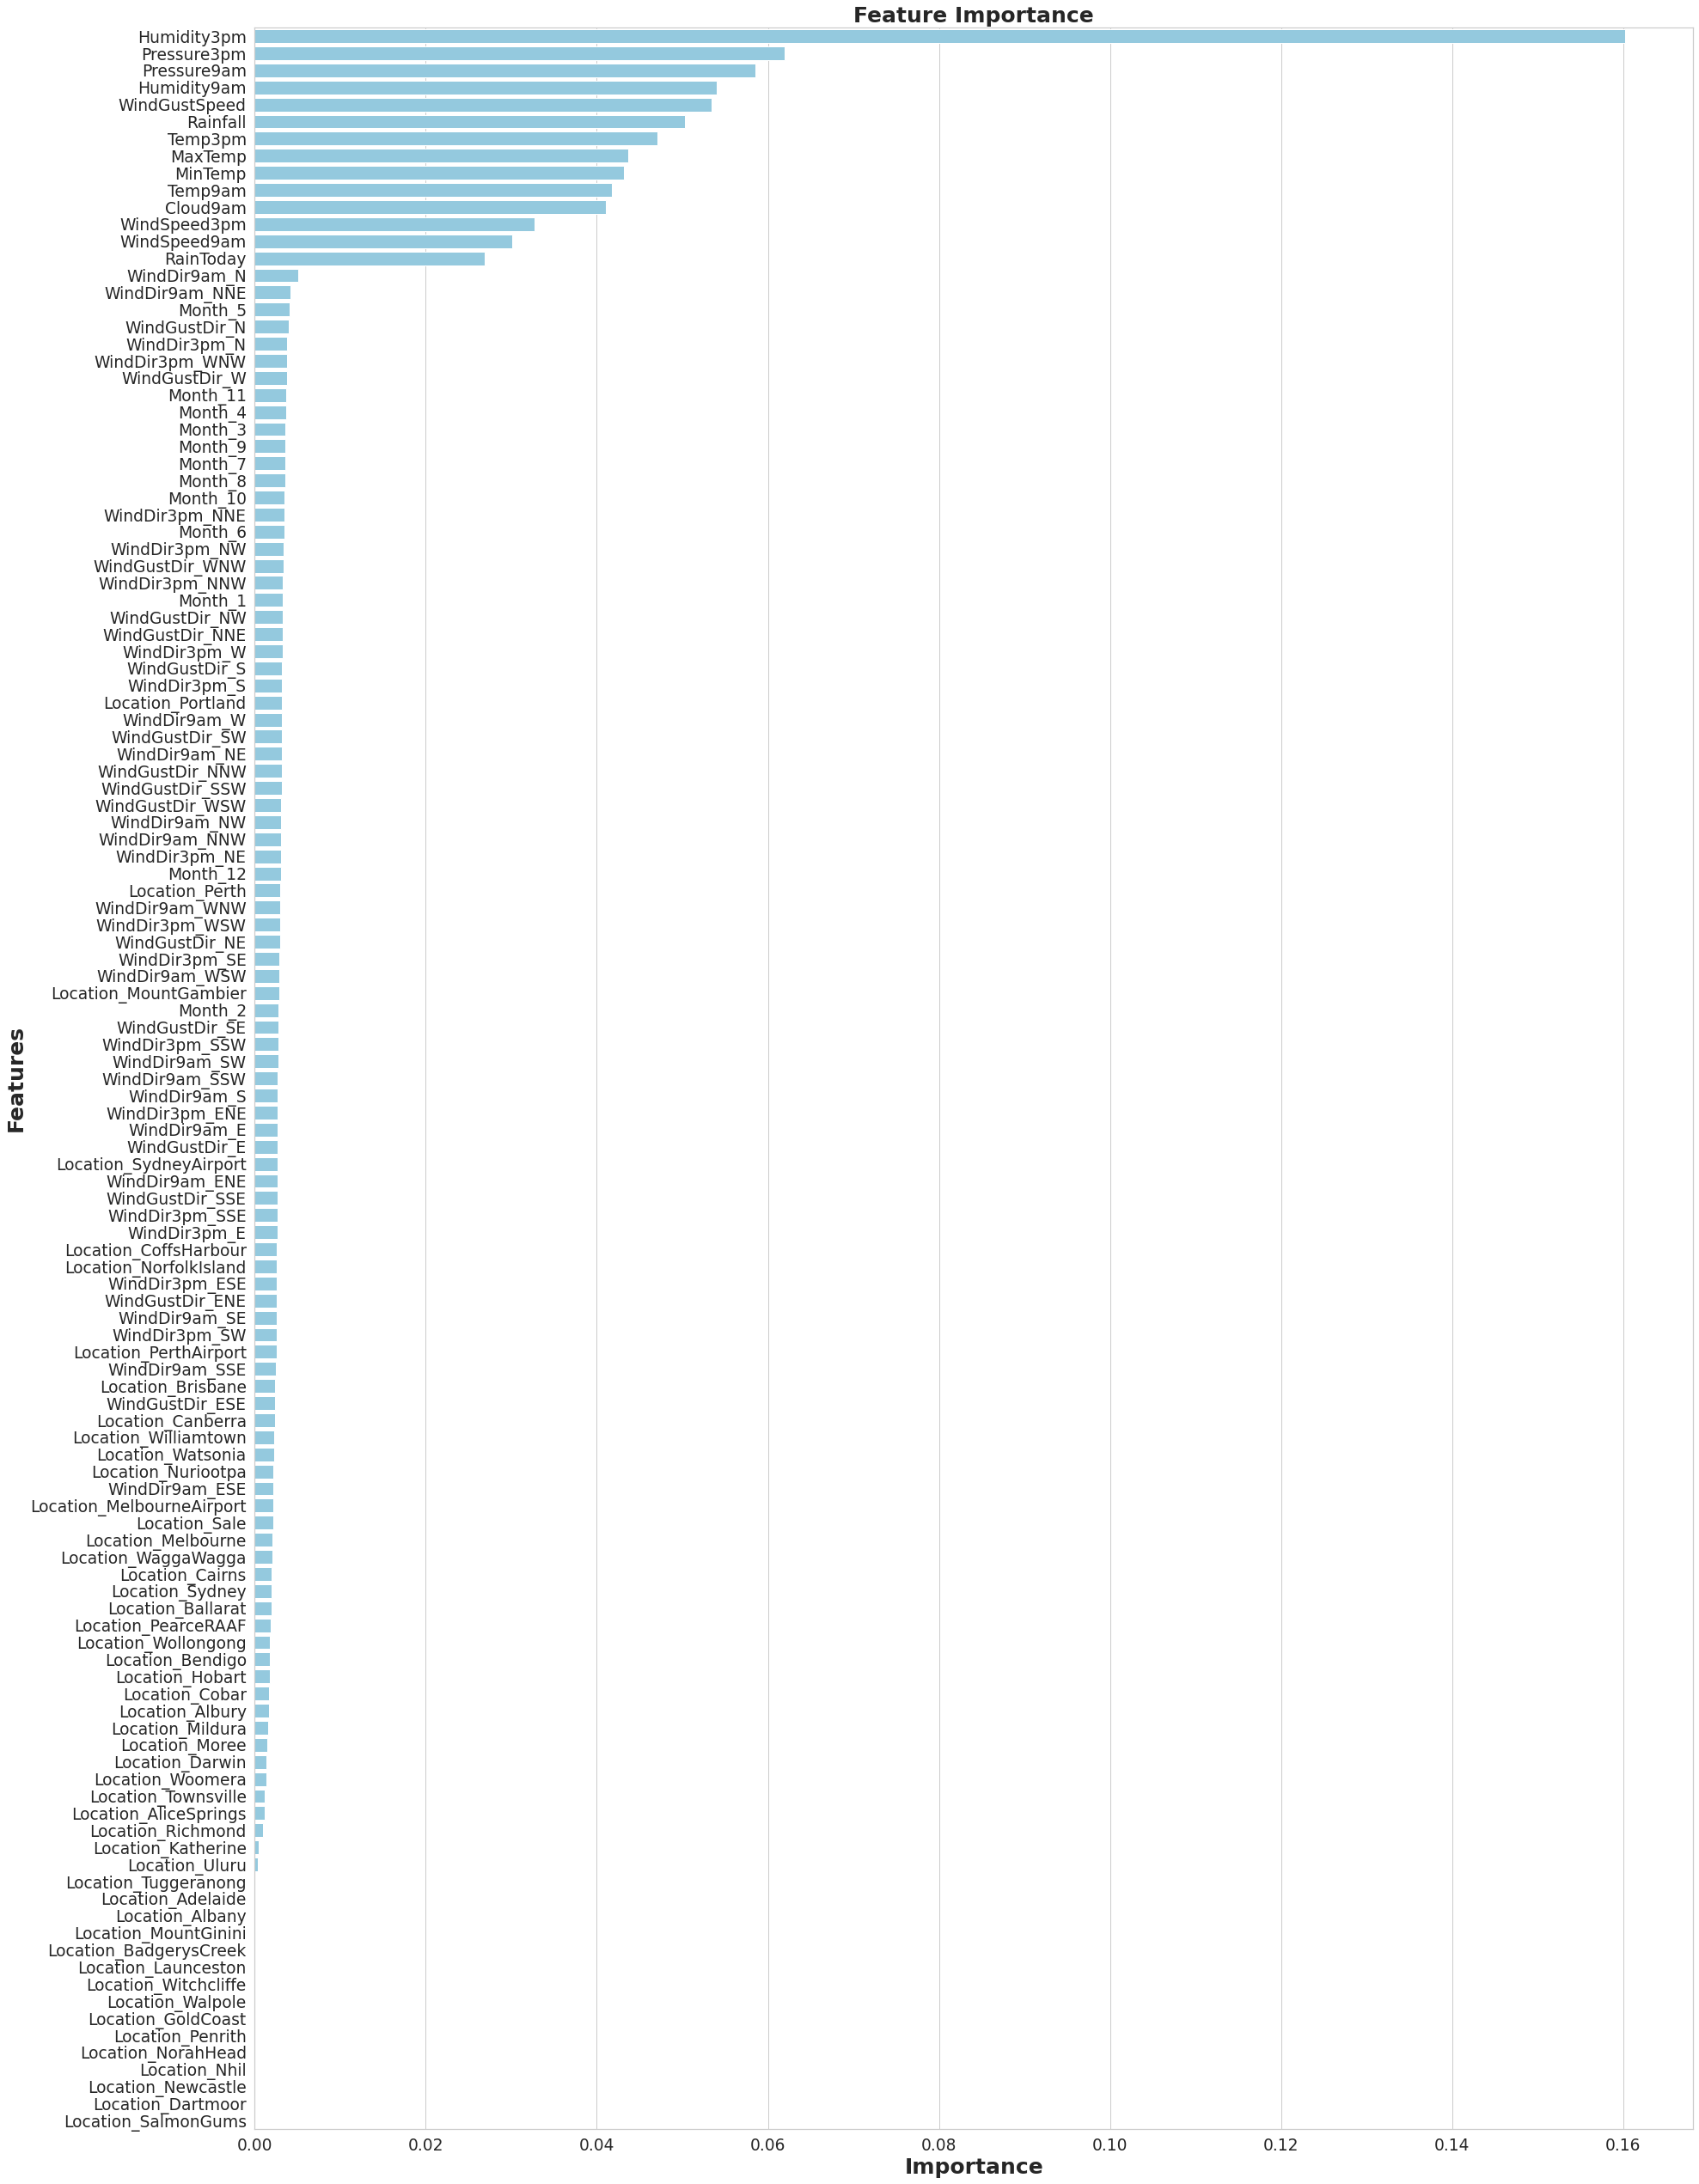

None

,Features,Gini-Importance
0,Humidity3pm,0.160164
1,Pressure3pm,0.061984
2,Pressure9am,0.058552
3,Humidity9am,0.053998
4,WindGustSpeed,0.053460
...,...,...
118,Location_NorahHead,0.000000
119,Location_Nhil,0.000000
120,Location_Newcastle,0.000000
121,Location_Dartmoor,0.000000


In [295]:
feats = {}

for feature, importance in zip(X_train.columns, rfc.feature_importances_):
    feats[feature] = importance
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,45)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)